<a href="https://colab.research.google.com/github/eduardo-almeida/DataScience/blob/main/EXERCICIO_3_DESCRITORES_MATEMATICA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

Você recebeu o arquivo **Swarm_Behaviour.csv**. Ele contém informações sobre locomoção de grupos de animais. Existe um atributo chamado **'Swarm_Behaviour'** que classifica o movimento como agrupado (1) e não agrupado (0).


1. É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

2. Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico).

Para cada experimento abaixo, considere 10 o número máximo de componentes.

3. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA.

4. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA.

5. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

6. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE.

7. Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

8. Qual foi a melhor estratégia para esse dado?







In [4]:
!gdown 1U4sl3kLoshBIs5UU6LSOQIzLSM-1IgpH

Downloading...
From (original): https://drive.google.com/uc?id=1U4sl3kLoshBIs5UU6LSOQIzLSM-1IgpH
From (redirected): https://drive.google.com/uc?id=1U4sl3kLoshBIs5UU6LSOQIzLSM-1IgpH&confirm=t&uuid=ee7669e9-ea3c-4728-a869-63d2c75f6dee
To: /content/Swarm_Behaviour.csv.zip
100% 84.1M/84.1M [00:01<00:00, 52.9MB/s]


In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('Swarm_Behaviour.csv.zip')  # sem 'compression'


In [7]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [8]:
df['Swarm_Behaviour'].value_counts()

,count
Swarm_Behaviour,
0.0,15355
1.0,7954


# Amostra do dado

In [9]:
df.sample(frac=0.1)

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
5096,929.55,-853.35,-0.27,7.55,-0.04,1.00,0.00,0.00,-0.04,1.00,...,9.13,-0.02,1.00,0.0,0.0,-0.02,1.00,14,2,1.0
4143,95.87,75.40,-13.78,-5.57,0.00,0.00,0.00,0.00,0.00,0.00,...,-17.23,0.00,0.00,0.0,0.0,0.00,0.00,39,0,0.0
20074,712.98,661.09,2.65,7.35,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.10,0.00,0.00,0.0,0.0,0.00,0.00,2,0,0.0
21217,1161.90,241.95,-2.00,-0.81,0.00,0.00,0.00,0.00,0.00,0.00,...,-10.93,0.00,0.00,0.0,0.0,0.00,0.00,50,0,0.0
16575,-478.29,-247.61,-8.06,1.94,-0.56,0.02,1.82,0.28,-0.32,0.01,...,0.23,-0.56,0.00,0.0,0.0,-0.31,0.09,24,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20209,-1352.71,-349.56,-0.58,-3.94,0.00,0.00,0.00,0.00,0.00,0.00,...,-5.23,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0.0
11900,776.80,-312.44,-9.17,-0.83,-1.00,0.07,0.00,0.00,-1.00,-0.06,...,-3.38,-0.96,-0.29,0.0,0.0,-0.02,-1.00,4,0,1.0
4541,1187.77,799.73,9.22,-1.99,-1.00,-1.00,0.00,0.00,0.00,0.00,...,-12.54,-1.00,-1.00,0.0,0.0,0.00,0.00,24,0,0.0
19367,449.05,899.98,-3.66,-4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,-7.25,0.00,0.00,0.0,0.0,0.00,0.00,1,0,0.0


In [10]:
df.sample(frac=0.2)['Swarm_Behaviour'].value_counts()

,count
Swarm_Behaviour,
0.0,3031
1.0,1631


In [11]:
df=df.sample(frac=0.2).reset_index(drop=True)

In [12]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,1370.83,-491.36,1.88,-2.76,0.00,0.00,0.00,0.00,0.00,0.00,...,0.17,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,-979.13,-66.88,-9.08,-2.84,-0.95,-0.30,0.00,0.00,-0.96,-0.29,...,-6.58,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1.0
2,-490.47,-674.36,2.54,-1.97,0.00,0.00,-0.11,0.43,0.12,-0.99,...,-0.58,0.00,0.00,0.12,0.42,-0.03,-1.00,112,4,1.0
3,1271.14,398.58,1.24,9.02,0.15,0.99,0.00,0.00,0.22,0.98,...,9.24,-0.06,1.00,0.00,0.00,0.06,-1.00,2,0,1.0
4,82.82,-689.10,-1.59,12.16,-0.02,1.04,0.00,0.00,0.00,0.00,...,12.89,0.00,1.04,0.00,0.00,0.00,0.00,12,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,729.78,932.26,1.77,-3.47,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.92,-0.04,-0.10,0.00,0.00,-0.01,0.00,1,0,0.0
4658,394.09,-22.92,1.94,5.74,0.00,1.00,0.00,0.00,0.00,0.00,...,6.61,0.00,1.00,0.00,0.00,0.00,0.00,15,0,0.0
4659,-481.03,-674.81,-0.97,4.28,0.00,0.00,0.06,-0.44,0.61,0.79,...,-1.97,0.00,0.00,0.05,0.44,-0.53,-0.85,112,49,0.0
4660,-858.94,-297.87,6.54,15.11,-0.86,0.51,-0.14,1.84,1.57,-2.17,...,5.96,0.84,0.55,0.00,0.00,2.37,-1.25,37,0,1.0


# Equilibrar o dado

In [13]:
df1=df[df['Swarm_Behaviour']==1].reset_index(drop=True)
df0=df[df['Swarm_Behaviour']==0][0:len(df1)].reset_index(drop=True)
df_equi=pd.concat([df0,df1],axis=0,ignore_index=True)

In [14]:
df_equi

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,1370.83,-491.36,1.88,-2.76,0.00,0.00,0.00,0.00,0.00,0.00,...,0.17,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,-327.24,-556.28,-13.76,-9.60,-1.00,1.00,0.00,0.00,0.00,0.00,...,-5.53,-1.00,0.00,0.00,0.00,0.00,0.00,6,0,0.0
2,86.38,688.48,3.35,14.54,0.00,1.00,-0.85,3.13,0.00,0.00,...,18.32,0.00,1.00,0.00,0.00,0.00,0.00,23,0,0.0
3,187.04,759.14,-7.92,-9.30,-0.25,-0.45,-7.93,-6.95,0.00,-0.08,...,2.78,-0.21,-0.57,0.00,0.00,0.02,0.00,116,0,0.0
4,897.37,-339.16,-0.61,-3.62,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.09,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,-872.71,550.76,9.60,-9.19,-0.54,0.84,0.55,-1.76,-2.56,-0.79,...,-5.29,0.71,-0.70,1.57,-0.96,2.67,-0.25,64,9,1.0
3226,1271.09,629.15,-7.67,-1.22,-0.84,-0.54,0.00,0.00,-1.00,0.03,...,6.40,-0.81,0.59,0.00,0.00,-0.57,0.82,1,0,1.0
3227,1179.14,214.14,-0.32,8.89,-0.04,1.00,0.00,0.00,-0.04,1.00,...,8.85,0.02,1.00,0.00,0.00,0.00,1.00,14,4,1.0
3228,-858.94,-297.87,6.54,15.11,-0.86,0.51,-0.14,1.84,1.57,-2.17,...,5.96,0.84,0.55,0.00,0.00,2.37,-1.25,37,0,1.0


In [15]:
df_equi['Swarm_Behaviour'].value_counts()

,count
Swarm_Behaviour,
0.0,1615
1.0,1615


# Teste com o t-sne

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [17]:
tsne = TSNE(n_components=2,n_iter=1000)

In [18]:
X=df_equi.drop('Swarm_Behaviour',axis=1)
y=df_equi["Swarm_Behaviour"]

In [19]:
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


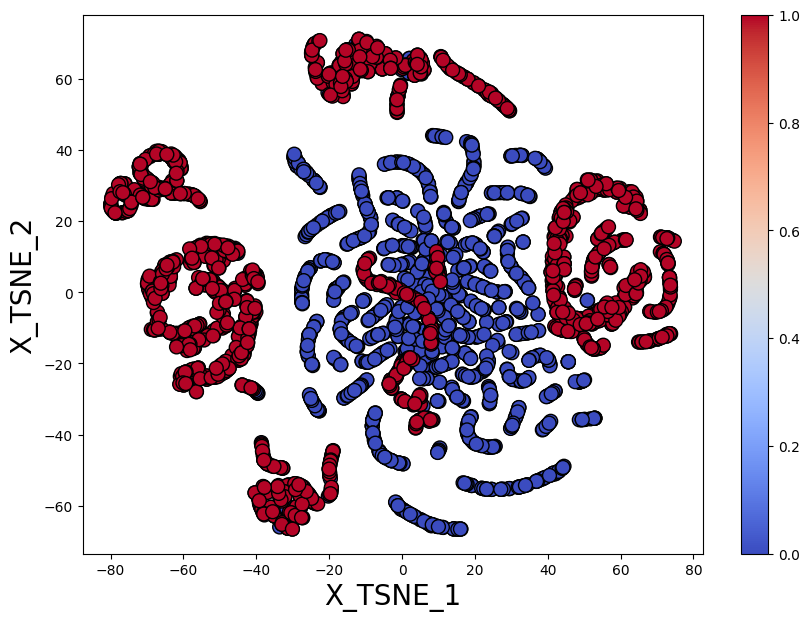

In [20]:
plt.figure(figsize=(10,7))
plt.xlabel('X_TSNE_1',fontsize=20)
plt.ylabel('X_TSNE_2',fontsize=20)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=100,edgecolors='black',cmap='coolwarm')
plt.colorbar();

1. É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
X = df_equi.drop('Swarm_Behaviour', axis=1)
y = df_equi['Swarm_Behaviour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy_RandomForest = accuracy_score(y_test, y_pred)
precision_RandomForest = precision_score(y_test, y_pred)
recall_RandomForest = recall_score(y_test, y_pred)
f1_RandomForest = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy_RandomForest}")
print(f"Precisão: {precision_RandomForest}")
print(f"Recall: {recall_RandomForest}")
print(f"F1-score: {f1_RandomForest}")

Acurácia: 0.9029927760577915
Precisão: 0.9012875536480687
Recall: 0.8974358974358975
F1-score: 0.8993576017130621


2. Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico).

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [31]:
explained_variance = pca.explained_variance_ratio_
# cumulative_variance = explained_variance.cumsum()

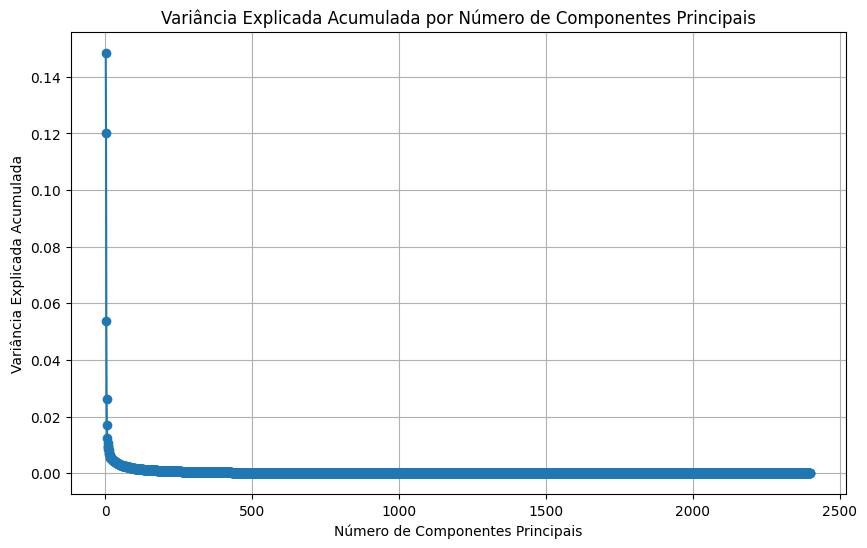

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Variância Explicada Acumulada por Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show();

Para cada experimento abaixo, considere 10 o número máximo de componentes.


3) Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA.

In [36]:
from sklearn.pipeline import Pipeline

In [80]:
accuracy_PCA = []
precision_PCA = []
recall_PCA = []
f1_PCA = []
component_range = range(1, 11)

In [81]:
for n in component_range:
    # Pipeline com PCA + Random Forest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('clf', RandomForestClassifier(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calcular métricas
    accuracy_PCA.append(accuracy_score(y_test, y_pred))
    precision_PCA.append(precision_score(y_test, y_pred))
    recall_PCA.append(recall_score(y_test, y_pred))
    f1_PCA.append(f1_score(y_test, y_pred))


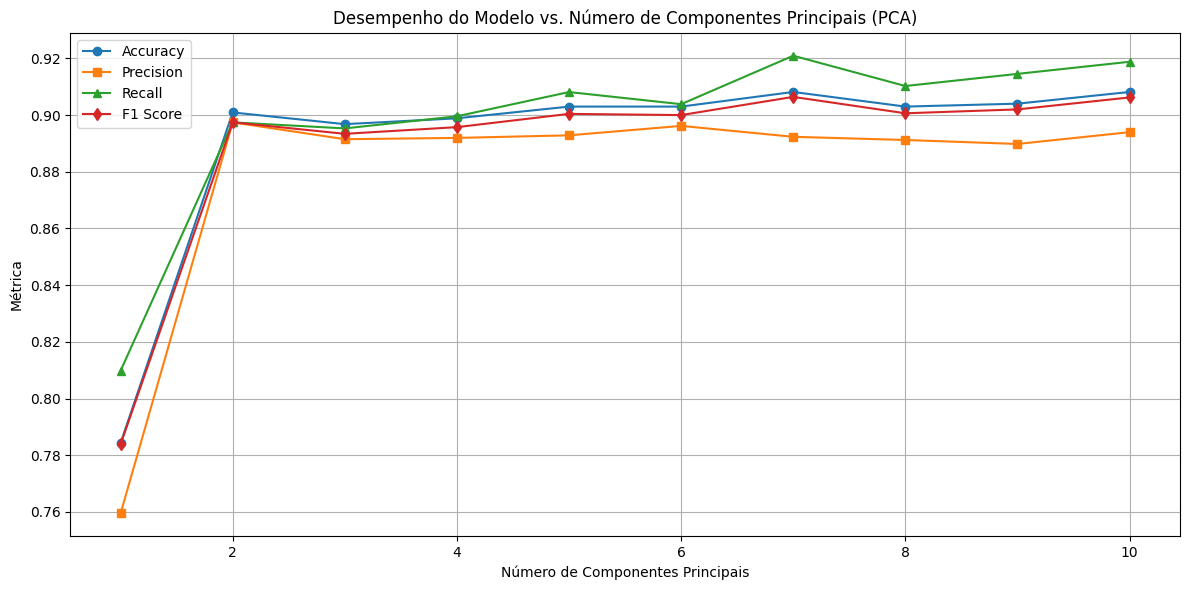

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(component_range, accuracy_PCA, label="Accuracy", marker='o')
plt.plot(component_range, precision_PCA, label="Precision", marker='s')
plt.plot(component_range, recall_PCA, label="Recall", marker='^')
plt.plot(component_range, f1_PCA, label="F1 Score", marker='d')
plt.title("Desempenho do Modelo vs. Número de Componentes Principais (PCA)")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

4) Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA.

In [40]:
from sklearn.decomposition import KernelPCA

In [101]:
accuracy_KPCA = []
precision_KPCA = []
recall_KPCA = []
f1_KPCA = []
component_range = range(1, 11)

In [102]:
for n in component_range:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kpca', KernelPCA(n_components=n, kernel='rbf', gamma=0.1, fit_inverse_transform=False)),
        ('clf', RandomForestClassifier(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy_KPCA.append(accuracy_score(y_test, y_pred))
    precision_KPCA.append(precision_score(y_test, y_pred))
    recall_KPCA.append(recall_score(y_test, y_pred))
    f1_KPCA.append(f1_score(y_test, y_pred))

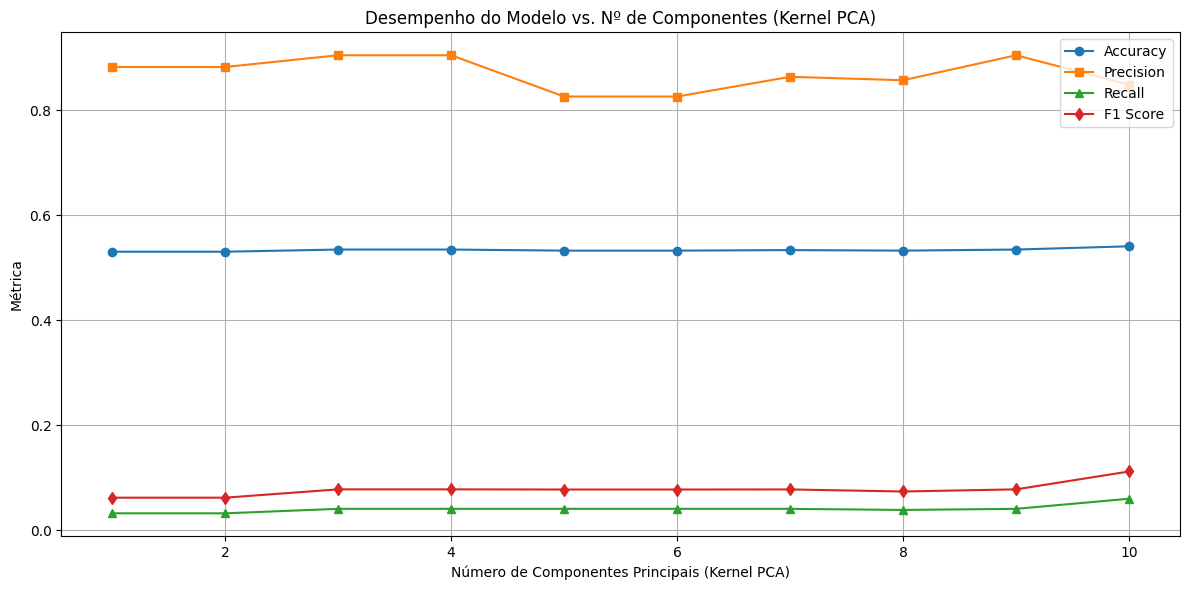

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(component_range, accuracy_KPCA, label="Accuracy", marker='o')
plt.plot(component_range, precision_KPCA, label="Precision", marker='s')
plt.plot(component_range, recall_KPCA, label="Recall", marker='^')
plt.plot(component_range, f1_KPCA, label="F1 Score", marker='d')
plt.title("Desempenho do Modelo vs. Nº de Componentes (Kernel PCA)")
plt.xlabel("Número de Componentes Principais (Kernel PCA)")
plt.ylabel("Métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

5) Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('clf', RandomForestClassifier(random_state=42))
])

In [46]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [48]:
print(f"Resultados com LDA (1 componente):")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")

Resultados com LDA (1 componente):
Accuracy : 0.654
Precision: 0.667
Recall   : 0.568
F1 Score : 0.614


6) Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE.

In [ ]:
from sklearn.manifold import TSNE

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [51]:
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Swarm_Behaviour'] = y.values

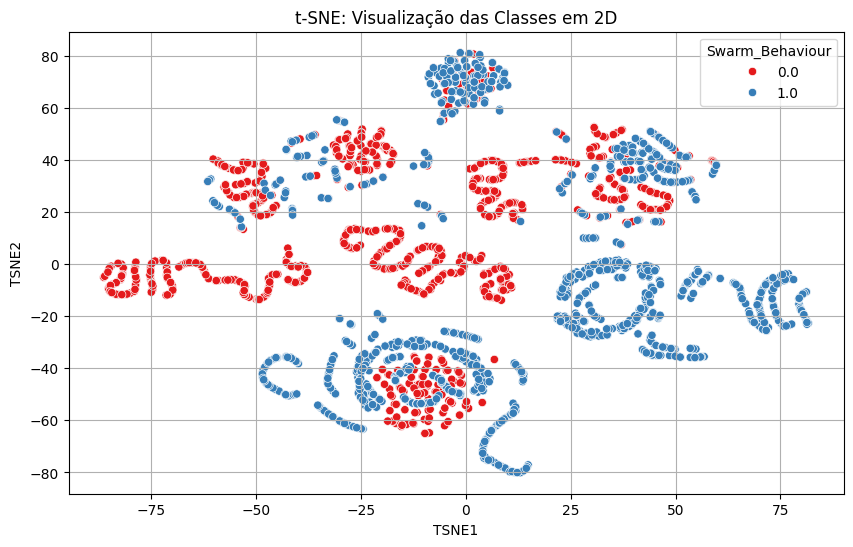

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Swarm_Behaviour', palette='Set1')
plt.title('t-SNE: Visualização das Classes em 2D')
plt.grid(True)
plt.show()

7) Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

In [87]:
import numpy as np

In [118]:
best_n_accuracy_PCA = component_range[np.argmax(accuracy_PCA)]
best_n_precision_PCA = component_range[np.argmax(precision_PCA)]
best_n_recall_PCA = component_range[np.argmax(recall_PCA)]
best_n_f1_PCA = component_range[np.argmax(f1_PCA)]

In [105]:
best_n_accuracy_KPCA = component_range[np.argmax(accuracy_KPCA)]
best_n_precision_KPCA = component_range[np.argmax(precision_KPCA)]
best_n_recall_KPCA= component_range[np.argmax(recall_KPCA)]
best_n_f1_KPCA = component_range[np.argmax(f1_KPCA)]

In [119]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

7

In [125]:
performance_data = {
    "Técnica": ["RandomForest", "PCA", "KPCA", "LDA"],
    "Accuracy": [accuracy_RandomForest, accuracy_PCA[best_n_accuracy_PCA-1], accuracy_KPCA[best_n_accuracy_KPCA-1], acc],
    "Precision": [precision_RandomForest, precision_PCA[best_n_precision_PCA-1], precision_KPCA[best_n_precision_KPCA-1], prec],
    "Recall": [recall_RandomForest, recall_PCA[best_n_recall_PCA-1], recall_KPCA[best_n_recall_KPCA-1], rec],
    "F1 Score": [f1_RandomForest,f1_PCA[best_n_f1_PCA-1], f1_KPCA[best_n_f1_KPCA-1], f1],
}


In [126]:
df_perf = pd.DataFrame(performance_data)

In [127]:
x = df_perf["Técnica"]
width = 0.2

<BarContainer object of 4 artists>

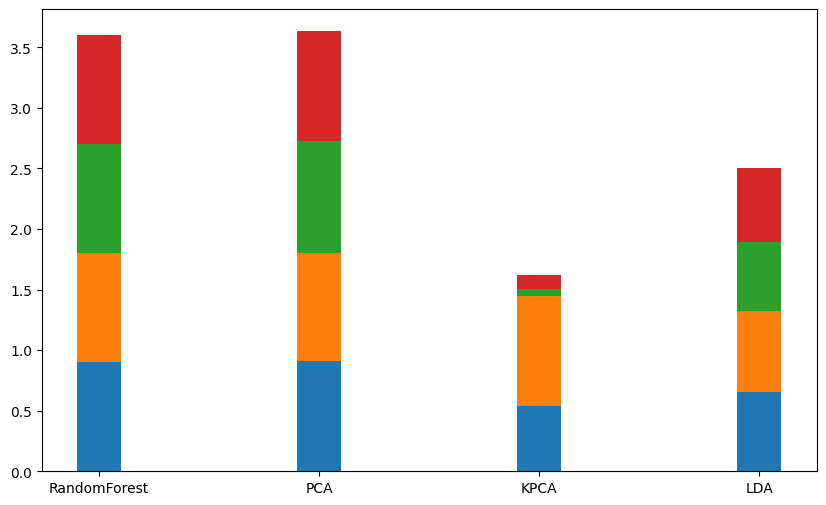

In [130]:
plt.figure(figsize=(10, 6))
plt.bar(x, df_perf["Accuracy"], width=width, label="Accuracy")
plt.bar(x, df_perf["Precision"], width=width, label="Precision", bottom=df_perf["Accuracy"])
plt.bar(x, df_perf["Recall"], width=width, label="Recall", bottom=df_perf["Accuracy"] + df_perf["Precision"])
plt.bar(x, df_perf["F1 Score"], width=width, label="F1 Score", bottom=df_perf["Accuracy"] + df_perf["Precision"] + df_perf["Recall"])


In [78]:
plt.clf()
bar_width = 0.2
x_indexes = range(len(df_perf))

<Figure size 640x480 with 0 Axes>

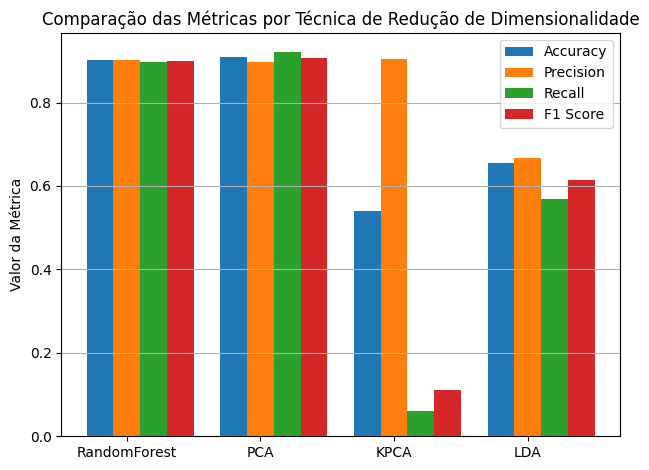

In [132]:
plt.bar([x - bar_width for x in x_indexes], df_perf["Accuracy"], width=bar_width, label="Accuracy")
plt.bar(x_indexes, df_perf["Precision"], width=bar_width, label="Precision")
plt.bar([x + bar_width for x in x_indexes], df_perf["Recall"], width=bar_width, label="Recall")
plt.bar([x + 2 * bar_width for x in x_indexes], df_perf["F1 Score"], width=bar_width, label="F1 Score")

plt.xticks(ticks=x_indexes, labels=df_perf["Técnica"])
plt.ylabel("Valor da Métrica")
plt.title("Comparação das Métricas por Técnica de Redução de Dimensionalidade")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

8) Qual foi a melhor estratégia para esse dado?

Para escolher a melhor medição de performance entre as diferentes métricas (Accuracy, Precision, Recall, F1 Score), o ideal é considerar o contexto do problema que você está resolvendo e os trade-offs entre as métricas. Cada métrica tem um foco diferente:

Accuracy: Mede a proporção de previsões corretas em relação ao total de previsões. Pode ser útil quando as classes estão balanceadas, mas pode ser enganosa se houver um desbalanceamento nas classes.

Precision: Mede a proporção de positivos previstos corretamente em relação ao total de positivos previstos. É importante quando os falsos positivos têm um custo alto (por exemplo, em diagnósticos médicos, onde errar ao identificar algo como positivo pode ser perigoso).

Recall: Mede a proporção de positivos identificados corretamente em relação ao total de reais positivos. É útil quando os falsos negativos são mais problemáticos (por exemplo, em detecção de fraudes, onde deixar de identificar uma fraude pode ter consequências graves).

F1 Score: É a média harmônica entre Precision e Recall. Ela busca equilibrar as duas métricas e é especialmente útil quando você precisa de um bom equilíbrio entre Precision e Recall, e não quer que uma métrica influencie demais a escolha do modelo.

Como escolher a melhor medição:
Verifique o contexto do seu problema:

Se você tem uma situação em que os falsos positivos ou os falsos negativos têm um custo mais alto, você pode priorizar Precision ou Recall, respectivamente.

Se você tem um equilíbrio entre os dois e quer uma métrica que combine ambos, o F1 Score pode ser a melhor escolha.

Análise das métricas nos gráficos:

A partir do gráfico gerado, observe qual técnica apresenta os melhores valores em cada métrica.

Se a Accuracy for alta em todas as técnicas, mas a Precision ou o Recall for significativamente mais baixo em uma técnica, você pode querer evitar essa técnica, dependendo do contexto.

O F1 Score é uma boa escolha quando você precisa de uma medida que balanceie bem Precision e Recall.

Se a principal preocupação for um equilíbrio geral entre precisão e sensibilidade, o F1 Score seria a melhor escolha. Caso você precise priorizar um aspecto específico (precisão ou recall), escolha a métrica mais relevante para o seu caso.
